In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import regridding._conservative_ramshaw

In [20]:
x, dx = np.linspace(-5, 5, 11, retstep=True)
y, dy = np.linspace(-5, 5, 11, retstep=True)

In [21]:
x, y = np.meshgrid(x, y, indexing="ij")

In [22]:
# a = 0 * x
# a[40:60] = 10
# a[:, 50:55] = 5
a = np.cos(x * x) + np.cos(y * y)
# a = x * y
a = a - a.min()
a = (a[1:, 1:] + a[1:, :~0] + a[:~0, 1:] + a[:~0, :~0]) / 4

In [23]:
# a = np.zeros((x.shape[0] - 1, x.shape[1] - 1))
# a[:, ::5] = 1
# a[::5, :] = 1

In [24]:
a.min()

0.046529218438707665

In [25]:
angle = 45 * u.deg
x_rot = x * np.cos(angle) - y * np.sin(angle)
y_rot = x * np.sin(angle) + y * np.cos(angle)
x_rot, y_rot = 2 * x_rot.value, 2 * y_rot.value
# x_rot = x
# y_rot = y

In [26]:
dx * dy * 2 * 2

4.0

<IPython.core.display.Javascript object>


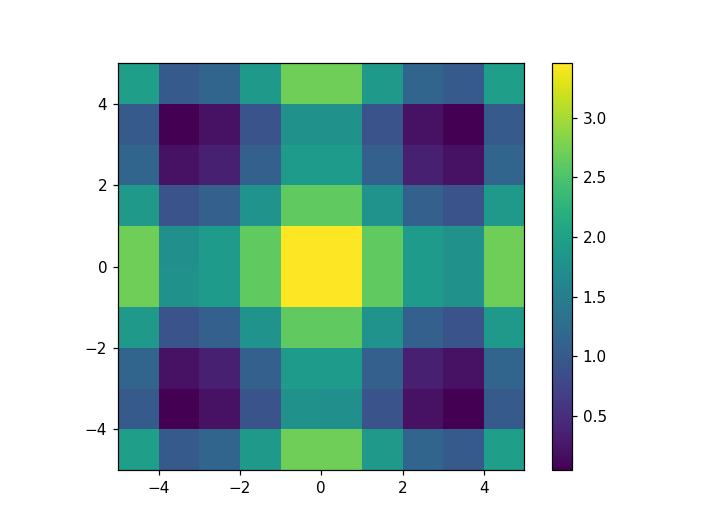

In [27]:
plt.figure()
plt.pcolormesh(x, y, a)
# plt.plot(x, y, color="black")
# plt.plot(x.T, y.T, color="black")
# plt.plot(x_rot, y_rot, color="red")
# plt.plot(x_rot.T, y_rot.T, color="red")
plt.gca().set_aspect("equal")
plt.colorbar()

In [28]:
%%time
weights = regridding.calc_weights(
    vertices_input=(x, y),
    vertices_output=(x_rot, y_rot),
)

index ()
CPU times: total: 0 ns
Wall time: 9.54 ms


In [29]:
%time
a_rot = regridding.regrid_from_weights(
    weights=weights,
    values_input=a,
)

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
# %%time
# a_rot = regridding.regrid(
#     values_input=a,
#     vertices_input=(x, y),
#     vertices_output=(x_rot, y_rot),
# )


<IPython.core.display.Javascript object>


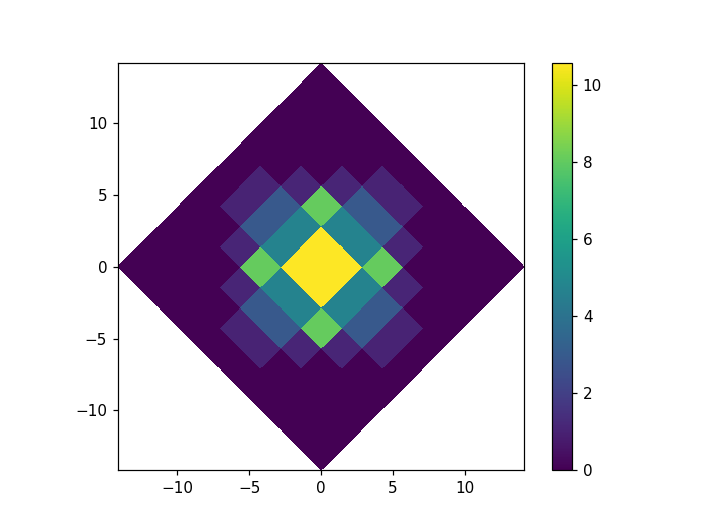

In [31]:
plt.figure()
plt.pcolormesh(x_rot, y_rot, a_rot)
# plt.plot(x, y, color="black")
# plt.plot(x.T, y.T, color="black")
# plt.plot(x_rot, y_rot, color="red")
# plt.plot(x_rot.T, y_rot.T, color="red")
plt.gca().set_aspect("equal")
plt.colorbar()

<IPython.core.display.Javascript object>


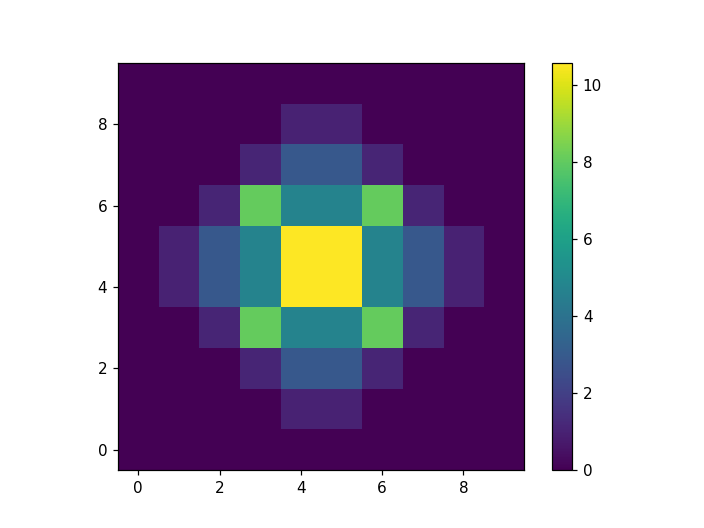

In [32]:
plt.figure()
plt.imshow(a_rot.T, origin="lower")
plt.colorbar()

In [33]:
a.sum()

152.07071001380504

In [34]:
a_rot.sum()

152.07071001380504

In [18]:
import regridding._conservative_ramshaw

In [19]:
regridding._conservative_ramshaw._sweep_axis.parallel_diagnostics(level=1)